Created by Mitchell Stanton-Cook

Bug fixes: m.stantoncook@uq.edu.au

---

# Modelling rolling of a dice #

Setup the plotting and import required modules:

In [88]:
%matplotlib inline

# Import the random modules random integer generator
from random import randint
import pylab

Define a function to return a random value between 1 and 6:

In [89]:
def throw_dice():
    """
    Simulates throwing a dice
    """
    # Intially a very simple model
    return randint(1, 6)

Generate a dice roll. Repeat it a few times to prove it's random:

In [91]:
print throw_dice()

2


Rewrite the throw_dice module so that it returns a list of required rolls:

In [94]:
def throw_dice(n=1):
    """
    Simulates throwing a dice
    :param n: the number of times the dice will be thrown. Defaults to 1.
    
    :returns: a list of results [1-6]
    """
    results = []
    for i in range(n):
        results.append(randint(1, 6))
    return results

Generate 25 consecutive dice rolls

In [95]:
print throw_dice(25)

[2, 3, 4, 1, 5, 5, 4, 5, 1, 3, 3, 3, 1, 4, 1, 2, 1, 2, 4, 2, 4, 2, 6, 2, 5]


Now, generate a function to sum the observations:

In [96]:
from collections import Counter

def dice_observation_calcs(obs):
    """
    Given a list of dice rolls (in range 1-6) prints the number of observations 
    for each value
    
    :param obs: a list of simulated rolls
    """
    print Counter(obs)
    

Investigate the number of times a number appears using the dice_observation_calcs function

In [97]:
dice_observation_calcs(throw_dice(1000))

Counter({2: 186, 3: 170, 4: 168, 5: 162, 6: 158, 1: 156})


Sort the keys by values (1-6), calculate the frequency & pretty print

In [98]:
from collections import Counter

def dice_observation_calcs(obs):
    """
    Given a list of dice rolls (in range 1-6) the the frequency of observations 
    for each value
    
    :param obs: a list of simulated rolls
    
    """
    counts = Counter(obs)
    s_keys = sorted(counts.keys())
    for elem in s_keys:
        print str(elem)+" "+str(counts[elem]/float(len(obs)))

Target = 0.166666666667 

In [103]:
dice_observation_calcs(throw_dice(100))

1 0.13
2 0.17
3 0.12
4 0.25
5 0.19
6 0.14


In [104]:
dice_observation_calcs(throw_dice(1000))

1 0.178
2 0.15
3 0.159
4 0.17
5 0.184
6 0.159


In [105]:
dice_observation_calcs(throw_dice(1000000))

1 0.167108
2 0.167162
3 0.166556
4 0.166269
5 0.166712
6 0.166193


New function. Just look at the number of '1' thrown

In [107]:
from collections import Counter

def dice_observation_calcs_for_one(obs):
    """
    Given a list of dice rolls (in range 1-6) returns the the frequency of observations 
    for the number of 1's rolled
    
    :param obs: a list of simulated rolls
    
    """
    counts = Counter(obs)
    return counts[1]/float(len(obs))

In [108]:
print dice_observation_calcs_for_one(throw_dice(10000))

0.1643


Now perform an experiment:

In [109]:
rolls = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
ones_obs = []
for roll in rolls:
    ones_obs.append(dice_observation_calcs_for_one(throw_dice(roll)))

In [111]:
print ones_obs

[0.3, 0.18, 0.164, 0.1639, 0.16804, 0.166335, 0.1667591]


In [114]:
print 1/(float(6))

0.166666666667


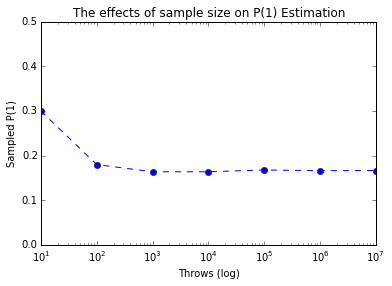

In [122]:
pylab.title("The effects of sample size on P(1) Estimation")
pylab.xlabel("Throws (log)")
pylab.ylabel("Sampled P(1)")
pylab.ylim(ymin=0, ymax=0.5)
pylab.semilogx(rolls, ones_obs, marker='o', linestyle='--')